In [6]:
# block 1

import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [8]:
# block 2

last_col_dict = {} # a dictionary to store key: English char index and value: # of occurance
char_key = [] # contains keys form 0 to 25
num_val = [] # contains occurance number

features_train = [] # contains all the feature lists of all instances in train dataset
feature_instance_train = [] # contains all the feature list of one instance in train dataset
labels_train = []

features_validation = [] # contains all the feature lists of all instances in validation dataset
feature_instance_validation = [] # contains all the feature list of one instance in validation dataset
labels_validation = []

features_test_with_label = [] # contains all the feature lists of all instances in validation dataset
feature_instance_test_with_label = [] # contains all the feature list of one instance in validation dataset
labels_test = []
labels_test_predict = []

total_index = 0
select_lang = "English" #"English" or "Greek"
train_dataset_filename = ""
validation_dataset_filename = ""
test_dataset_filename = ""
GNB_DS_filename = ""
BaseDT_filename = ""
BestDT_filename = ""
PER_filename = ""
BaseMLP_filename = ""
BestMLP_filename = ""
target_label = ""

if select_lang == "English":
    total_index = 26
    train_dataset_filename = "./Assig1-Dataset/train_1.csv"
    validation_dataset_filename = "./Assig1-Dataset/val_1.csv"
    test_dataset_filename = "./Assig1-Dataset/test_with_label_1.csv"
    GNB_DS_filename = "GNB-DS1.csv"
    BaseDT_filename = "Base-DT-DS1.csv"
    BestDT_filename = "Best-DT-DS1.csv"
    PER_filename = "PER-DS1.csv"
    BaseMLP_filename = "Base-MLP-DS1.csv"
    BestMLP_filename = "Best-MLP-DS1.csv"
    target_label = np.arange(26)
else:
    total_index = 10
    train_dataset_filename = "./Assig1-Dataset/train_2.csv"
    validation_dataset_filename = "./Assig1-Dataset/val_2.csv"
    test_dataset_filename = "./Assig1-Dataset/test_with_label_2.csv"
    GNB_DS_filename = "GNB-DS2.csv"
    BaseDT_filename = "Base-DT-DS2.csv"
    BestDT_filename = "Best-DT-DS2.csv"
    PER_filename = "PER-DS2.csv"
    BaseMLP_filename = "Base-MLP-DS2.csv"
    BestMLP_filename = "Best-MLP-DS2.csv"
    target_label = np.arange(10)


# initialize a dictionary
for letter in range(total_index):
    last_col_dict[letter] = 0

In [9]:
# block 3

# open train dataset
with open(train_dataset_filename, "r") as f:
    reader = csv.reader(f, delimiter = ',')
    for i, line in enumerate(reader):
        feature_instance_train = line[:-1]
        feature_instance_train = [int(x) for x in feature_instance_train] # convert each element to int
        features_train.append(feature_instance_train)
        labels_train.append([int(line[-1])])
        last_col_dict[int(line[-1])] = last_col_dict[int(line[-1])] + 1

# open validation dataset
with open(validation_dataset_filename, "r") as f:
    reader = csv.reader(f,delimiter = ',')
    for i, line in enumerate(reader):
        feature_instance_validation = line[:-1]
        feature_instance_validation = [int(x) for x in feature_instance_validation] # convert each element to int
        features_validation.append(feature_instance_validation)
        labels_validation.append([int(line[-1])])
        last_col_dict[int(line[-1])] = last_col_dict[int(line[-1])] + 1

# open test dataset
with open(test_dataset_filename, "r") as f:
    reader = csv.reader(f,delimiter = ',')
    for i, line in enumerate(reader):
        feature_instance_test_with_label = line[:-1]
        feature_instance_test_with_label = [int(x) for x in feature_instance_test_with_label] # convert each element to int
        features_test_with_label.append(feature_instance_test_with_label)
        labels_test.append([int(line[-1])])
        last_col_dict[int(line[-1])] = last_col_dict[int(line[-1])] + 1

# loop through the dictionary
for key, val in last_col_dict.items():
    char_key.append(key)
    num_val.append(val)

#convert list to ndarray
X_train = np.array(features_train)
Y_train = np.array(labels_train).flatten()
X_validation = np.array(features_validation)
Y_validation = np.array(labels_validation).flatten()
X_test = np.array(features_test_with_label)
Y_test = np.array(labels_test).flatten()

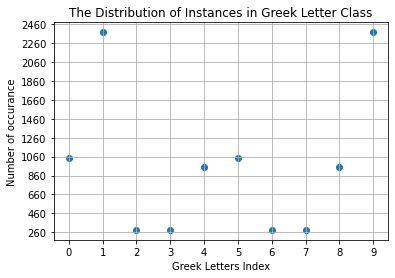

In [63]:
# block 4

# Task 1: plot the distribution
plt.scatter(char_key, num_val)
plt.xlabel(select_lang + " Letters Index")
plt.ylabel("Number of occurance")
plt.title("The Distribution of Instances in "+select_lang+" Letter Class")
x_data = np.arange(0, total_index, 1)
plt.xticks(x_data)
if select_lang=="English":
    y_data = np.arange(44, 70, 1)
else:
    y_data = np.arange(260, 2500, 200)
plt.yticks(y_data)
plt.grid()
if select_lang == "Greek":
    plt.savefig("The Distribution of Instances in Greek Letter Class.png")
else:
    plt.savefig("The Distribution of Instances in English Letter Class.png")
plt.show()

task (a) GND for Greek
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        55
           1       0.93      0.89      0.91       125
           2       0.28      0.80      0.41        15
           3       0.34      0.93      0.50        15
           4       0.59      0.40      0.48        50
           5       0.76      0.62      0.68        55
           6       0.24      0.73      0.37        15
           7       1.00      0.93      0.97        15
           8       0.88      0.30      0.45        50
           9       0.77      0.73      0.75       125

    accuracy                           0.67       520
   macro avg       0.64      0.68      0.60       520
weighted avg       0.75      0.67      0.68       520



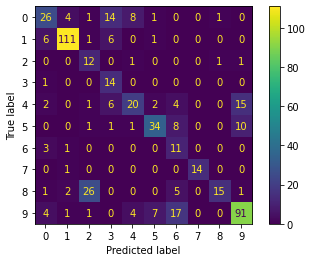

In [64]:
# block 5

# Task 2: (a) Gaussian Naive Bayes Classifier

clf = GaussianNB()

#Training
clf.fit(X_train, Y_train)

#validation
# clf.fit(X_validation, Y_validation)

#prediction
labels_test_predict = clf.predict(features_test_with_label)
# print(labels_test)
#write test result to csv file
count_instance = 0
with open(GNB_DS_filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    print("task (a) GND for "+ select_lang)
    for origi_label, result_label in zip(labels_test, labels_test_predict):
        # print(origi_label, result_label)
        count_instance += 1
        csvwriter.writerow([count_instance, int(result_label)])

# confusion matrix
# matrix = confusion_matrix(labels_test, labels_test_predict)

report = ""
report = classification_report(Y_test, labels_test_predict, labels=target_label)
print(report)

plot_confusion_matrix(clf,X_test,Y_test)
if select_lang == "Greek":
    plt.savefig("GNB-DS2-plot-confusion-matrix.png")
else:
    plt.savefig("GNB-DS1-plot-confusion-matrix.png")
plt.show()
    




task (b) Base-DT for Greek
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        55
           1       0.91      0.92      0.91       125
           2       0.50      0.53      0.52        15
           3       0.62      0.67      0.65        15
           4       0.55      0.48      0.51        50
           5       0.72      0.76      0.74        55
           6       0.88      0.47      0.61        15
           7       0.86      0.80      0.83        15
           8       0.78      0.86      0.82        50
           9       0.78      0.81      0.80       125

    accuracy                           0.78       520
   macro avg       0.75      0.71      0.72       520
weighted avg       0.78      0.78      0.78       520



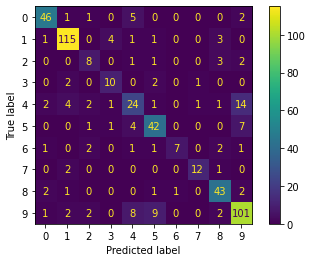

In [65]:
# block 6

# Task 2: (b) Base-DT

baseDT_classifier = DecisionTreeClassifier(criterion="entropy")

#train
baseDT_classifier.fit(X_train, Y_train)

#validation
# baseDT_classifier.fit(X_validation, Y_validation)

#prediction
labels_test_predict = baseDT_classifier.predict(features_test_with_label)

#write test result to csv file
count_instance = 0
with open(BaseDT_filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    print("task (b) Base-DT for "+ select_lang) 
    for origi_label, result_label in zip(labels_test, labels_test_predict):
        # print(origi_label, result_label)
        count_instance += 1
        csvwriter.writerow([count_instance, int(result_label)])

# confusion matrix
# matrix = confusion_matrix(labels_test, labels_test_predict)
# print(matrix)

report = ""
report = classification_report(Y_test, labels_test_predict, labels=target_label)
print(report)

plot_confusion_matrix(baseDT_classifier,X_test,Y_test)
if select_lang == "Greek":
    plt.savefig("Base-DT-DS2-plot-confusion-matrix.png")
else:
    plt.savefig("Base-DT-DS1-plot-confusion-matrix.png")
plt.show()

task (c) Best-DT for Greek
best_param {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_impurity_decrease': 0.0001, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        55
           1       0.87      0.88      0.87       125
           2       0.29      0.40      0.33        15
           3       0.50      0.60      0.55        15
           4       0.43      0.40      0.41        50
           5       0.56      0.58      0.57        55
           6       0.38      0.20      0.26        15
           7       1.00      0.67      0.80        15
           8       0.76      0.78      0.77        50
           9       0.63      0.63      0.63       125

    accuracy                           0.67       520
   macro avg       0.62      0.59      0.59       520
weighted avg       0.67      0.67      0.67       520



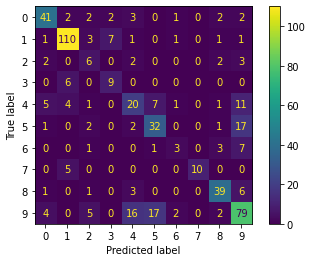

In [66]:
# block 7

# Task 2: (c) Best-DT
tree_para = {"criterion": ["gini", "entropy"], "max_depth": [10, None], "min_samples_split": [5], "min_impurity_decrease": [0.0001], "class_weight": ["balanced", None]}
clf_c = GridSearchCV(DecisionTreeClassifier(), tree_para)

#train
clf_c.fit(X_train, Y_train)

#validation
clf_c.fit(X_validation, Y_validation)

#prediction
labels_test_predict = clf_c.predict(features_test_with_label)

#write test result to csv file
count_instance = 0
with open(BestDT_filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    print("task (c) Best-DT for "+ select_lang) 
    for origi_label, result_label in zip(labels_test, labels_test_predict):
        # print(origi_label, result_label)
        count_instance += 1
        csvwriter.writerow([count_instance, int(result_label)])

#best params
best_param = clf_c.best_params_
print("best_param", best_param)

#confusion matrix
# matrix = confusion_matrix(labels_test, labels_test_predict)
# print("matrix", matrix)

report = ""
report = classification_report(Y_test, labels_test_predict, labels=target_label)
print(report)

plot_confusion_matrix(clf_c,X_test,Y_test)
if select_lang == "Greek":
    plt.savefig("Best-DT-DS2-plot-confusion-matrix.png")
else:
    plt.savefig("Best-DT-DS1-plot-confusion-matrix.png")
plt.show()

task (d) Perceptron for Greek
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        55
           1       0.92      0.97      0.95       125
           2       0.73      0.53      0.62        15
           3       0.88      0.93      0.90        15
           4       0.77      0.54      0.64        50
           5       0.82      0.89      0.85        55
           6       0.83      0.33      0.48        15
           7       1.00      1.00      1.00        15
           8       0.81      0.84      0.82        50
           9       0.88      0.82      0.85       125

    accuracy                           0.84       520
   macro avg       0.83      0.78      0.79       520
weighted avg       0.84      0.84      0.83       520



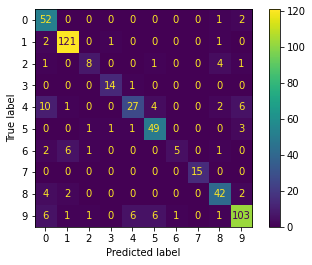

In [67]:
# block 8

# Task 2: (d) PER
clf_d = Perceptron()

#train
clf_d.fit(X_train, Y_train)

#validation
# clf_d.fit(X_validation, Y_validation)

#prediction
labels_test_predict = clf_d.predict(features_test_with_label)

#write test result to csv file
count_instance = 0
with open(PER_filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    print("task (d) Perceptron for "+ select_lang) 
    for origi_label, result_label in zip(labels_test, labels_test_predict):
        # print(origi_label, result_label)
        count_instance += 1
        csvwriter.writerow([count_instance, int(result_label)])

#confusion matrix
# matrix = confusion_matrix(labels_test, labels_test_predict)
# print("matrix", matrix)

report = ""
report = classification_report(Y_test, labels_test_predict, labels=target_label)
print(report)

plot_confusion_matrix(clf_d,X_test,Y_test)
if select_lang == "Greek":
    plt.savefig("PER-DS2-plot-confusion-matrix.png")
else:
    plt.savefig("PER-DS1-plot-confusion-matrix.png")
plt.show()

task (e) Base-MLP for English
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.00      0.00      0.00         2
           2       0.57      1.00      0.73         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         4
           7       1.00      0.33      0.50         3
           8       0.38      1.00      0.55         3
           9       0.67      0.50      0.57         4
          10       0.29      0.67      0.40         3
          11       0.50      0.25      0.33         4
          12       0.40      0.67      0.50         3
          13       0.38      0.75      0.50         4
          14       0.27      1.00      0.43         3
          15       1.00      0.67      0.80         3
          16       0.00      0.00      0.00        

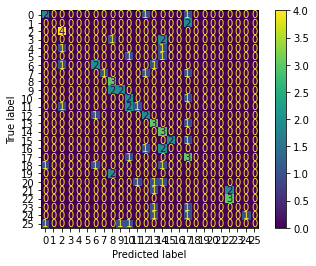

In [10]:
# block 9

# Task 2: (e) Base-MLP

clf_e = MLPClassifier(solver="sgd", hidden_layer_sizes=(100, ), activation="logistic")

#train
clf_e.fit(X_train, Y_train)

#validation
# clf_e.fit(X_validation, Y_validation)

#prediction
labels_test_predict = clf_e.predict(features_test_with_label)

#write test result to csv file
count_instance = 0
with open(BaseMLP_filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    print("task (e) Base-MLP for "+ select_lang) 
    for origi_label, result_label in zip(labels_test, labels_test_predict):
        # print(origi_label, result_label)
        count_instance += 1
        csvwriter.writerow([count_instance, int(result_label)])

# #confusion matrix
# matrix = confusion_matrix(labels_test, labels_test_predict)
# print("matrix", matrix)

report = ""
report = classification_report(Y_test, labels_test_predict, labels=target_label)
print(report)

plot_confusion_matrix(clf_e,X_test,Y_test)
if select_lang == "Greek":
    plt.savefig("Base-MLP-DS2-plot-confusion-matrix.png")
else:
    plt.savefig("Base-MLP-DS1-plot-confusion-matrix.png")
plt.show()

task (f) Best-MLP for English
accu_score 58.572695035460995
best_param {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2
           2       0.60      0.75      0.67         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.67      0.50      0.57         4
           7       0.20      0.33      0.25         3
           8       0.75      1.00      0.86         3
           9       0.75      0.75      0.75         4
          10       0.67      0.67      0.67         3
          11       0.75      0.75      0.75         4
          12       0.50      0.33      0.40         3
          13       0.50      0.75      0.60         4
          14       1.00      0.33      0.

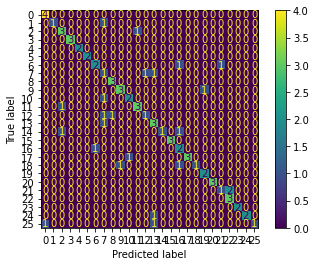

In [11]:
# block 10

# Task 2: (f) Best-MLP
per_para = {"activation": ["logistic", "identity", "tanh", "relu"], "solver": ["adam", "sgd"], "hidden_layer_sizes": [(30,50), (10,10,)]}
clf_f = GridSearchCV(MLPClassifier(), per_para)

#train
clf_f.fit(X_train, Y_train)

#validation
clf_f.fit(X_validation, Y_validation)

#prediction
labels_test_predict = clf_f.predict(features_test_with_label)

#write test result to csv file
count_instance = 0
with open(BestMLP_filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    print("task (f) Best-MLP for "+ select_lang) 
    for origi_label, result_label in zip(labels_test, labels_test_predict):
        # print(origi_label, result_label)
        count_instance += 1
        csvwriter.writerow([count_instance, int(result_label)])

#check test accuracy
accu_score = clf_f.best_score_ * 100
print("accu_score", accu_score)

#best params
best_param = clf_f.best_params_
print("best_param", best_param)

#confusion matrix
# matrix = confusion_matrix(labels_test, labels_test_predict)
# print("matrix", matrix)

report = ""
report = classification_report(Y_test, labels_test_predict, labels=target_label)
print(report)

plot_confusion_matrix(clf_f,X_test,Y_test)
if select_lang == "Greek":
    plt.savefig("best-MLP-DS2-plot-confusion-matrix.png")
else:
    plt.savefig("best-MLP-DS1-plot-confusion-matrix.png")
plt.show()